In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = 1
b = 1
def dydt(t,a,b):
    return 2*a*t + b

def findParams(y0,push,xz,yz):
    # Find a and b depending on the objective
    c = y0
    b = push
    a = (yz-c-(b*xz)) / (xz**2)
    return (a,b,c)


def simulate(time,a,b,y0=0,dt=0.1):

    y = y0
    vtime = np.arange(0,time+dt*2,dt)
    y_store = np.zeros(len(vtime))

    for i,t in enumerate(vtime[:-1]):
        y_store[i] = y
        y += dydt(vtime[i],a,b)*dt

    return vtime[:-1],y_store[:-1]


dt = 1
vtime,yt = simulate(10,1,1)

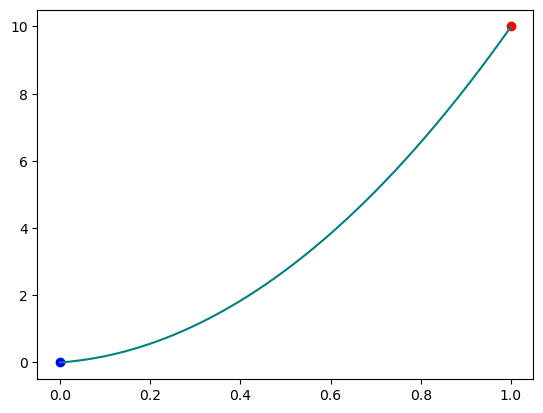

In [3]:
# Set objective x,y
xz,yz = (1,10)

# Set initial point x,y
x0,y0 = (0,0)

# set initial push = dydt(0)
push = 1

a,b,c = findParams(y0,push,xz,yz)

# Simulation
dt = 0.001
vtime,yt = simulate(xz,a,b,y0,dt=dt)

# Plot
plt.plot(vtime,yt,c='teal')
plt.scatter(x0,y0,c='blue')
plt.scatter(xz,yz,c='red')



In [4]:
yt[-1]

9.991

In [5]:
# Set objective x,y
xz,yz = (110,500)

# Set initial point x,y
x0,y0 = (0,0)

# set initial push = dydt(0)
push = 0.1

def sim(xz=[1],yz=[1],x0=0,y0=0,push=1,dt=0.1):
    vtime = []
    vtrace = []


    for i,simTime in enumerate(xz):

        push = -push
        a,b,c = findParams(y0,push,simTime-xz[i-1]*(i>0),yz[i])
        # Simulation
        time,yt = simulate(simTime-xz[i-1]*(i>0),a,b,y0,dt=dt)

        y0 = yt[-1]

        vtime.append(time)   
        vtrace.append(yt)
    
    #vtime = np.ravel(vtime)
    vtrace = np.hstack(vtrace)
    vtime = np.linspace(0,xz[-1],len(vtrace))
    return vtime,vtrace

push = 5
xz = [1,2,3,5,6,7]
yz = [1,-1,-2,-3,1,1]
vtime,vtrace = sim(xz=xz,yz=yz,push=push,dt=0.00001)

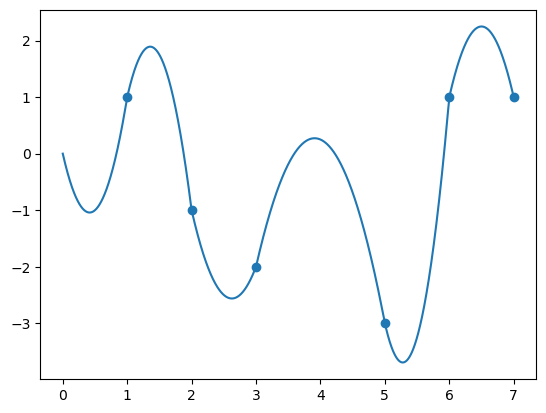

In [6]:
plt.plot(vtime,vtrace)

plt.scatter(xz,yz)

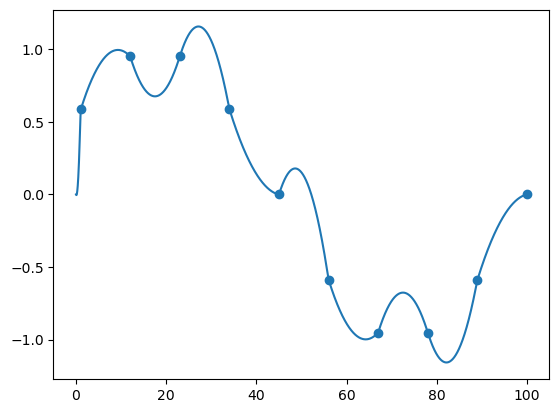

In [7]:
push = 0.1
xz = np.linspace(1,100,10)

yz = np.sin(2*np.pi*push*xz)
vtime,vtrace = sim(xz=xz,yz=yz,push=push,dt=0.01)

plt.plot(vtime,vtrace)
plt.scatter(xz,yz)

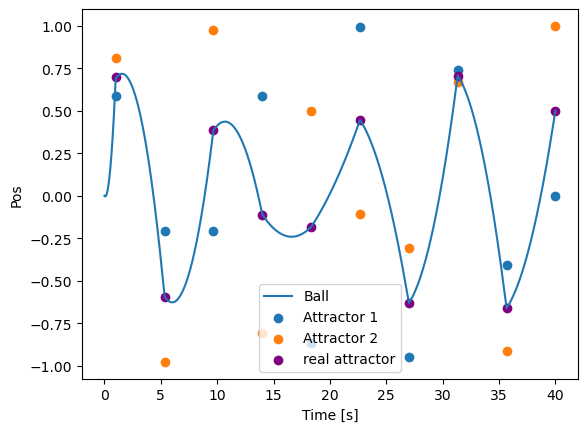

In [8]:
push = 0.1
xz = np.linspace(1,40,10)
yz = np.sin(2*np.pi*push*xz)
yz2 = np.cos(2*np.pi*push*xz)
y0 = 0

vtime,vtrace = sim(xz=xz,yz=(yz2+yz)/2,y0=0,push=push,dt=0.01)

plt.plot(vtime,vtrace)
plt.scatter(xz,yz)
plt.scatter(xz,yz2)
plt.scatter(xz,(yz+yz2) / 2,c='purple')
plt.legend(['Ball','Attractor 1','Attractor 2','real attractor'])
plt.xlabel('Time [s]')
plt.ylabel('Pos')

plt.savefig('trajectory.png')
#plt.clf()

In [22]:
from matplotlib.animation import FuncAnimation,FFMpegWriter

%matplotlib


Using matplotlib backend: QtAgg


In [58]:

fig = plt.figure()

ball1 = plt.scatter(0,yz[0])
ball2 = plt.scatter(0,yz2[0])
trajectory = plt.scatter(0,vtrace[0],c='red')

plt.plot(vtime,vtrace,alpha=0.3,color='purple')

[plt.axvline(x) for x in xz]
plt.scatter(xz,(yz+yz2) / 2,color='teal')
            
plt.ylim([-1,1])


def update(frame):


    time = vtime[np.argmin(abs(vtrace-frame))]
        
    pos1 = yz[time<xz][0]
    pos2 = yz2[time<xz][0]

    plt.title(f'Time: {round(time,2)} s')
    trajectory.set_offsets([time,frame])
    
    ball1.set_offsets([time,pos1])
    ball2.set_offsets([time,pos2])

    plt.xlim([time-(dt*500),time+(dt*500)])



anim = FuncAnimation(fig,update,frames=vtrace[::10],blit=False,cache_frame_data=False,interval=.01)



#anim.save('animation.gif',fps=60)